# 4.9 Visualizations in Python

In [1]:
#import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as ply
import seaborn as sns
import scipy

In [2]:
#set path
path = r'/Users/shelbysteele/Documents/Instacart Basket Anaysis-1022'

In [3]:
#import data
df_ords_prods = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_flagged.pkl'))

In [10]:
df_ords_prods.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,_merge,price_range_loc,Busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_order,spending_flag,median_days_since_prior_order,frequency_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,both,Mid-range product,Regularly busy,Average Orders,10,New customer,6.367188,Low Spender,20.5,Non-frequent customer
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,both,Mid-range product,Slowest days,Average Orders,10,New customer,6.367188,Low Spender,20.5,Non-frequent customer
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,both,Mid-range product,Slowest days,Most Orders,10,New customer,6.367188,Low Spender,20.5,Non-frequent customer
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,both,Mid-range product,Slowest days,Average Orders,10,New customer,6.367188,Low Spender,20.5,Non-frequent customer
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,both,Mid-range product,Slowest days,Most Orders,10,New customer,6.367188,Low Spender,20.5,Non-frequent customer


<AxesSubplot:>

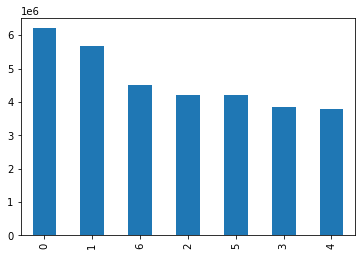

In [4]:
#creating a bar chart
df_ords_prods['orders_day_of_week'].value_counts().plot.bar()

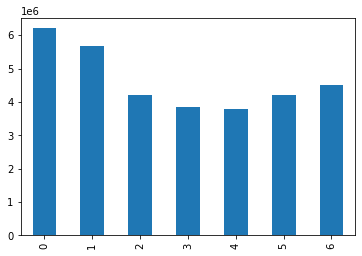

In [5]:
#using sort index on map
bar = df_ords_prods['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [6]:
#printing frequencies 
df_ords_prods['orders_day_of_week'].value_counts()

0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: orders_day_of_week, dtype: int64

In [7]:
#using sort index on printed frequencies
df_ords_prods['orders_day_of_week'].value_counts().sort_index()

0    6204182
1    5660230
2    4213830
3    3840534
4    3783802
5    4205791
6    4496490
Name: orders_day_of_week, dtype: int64

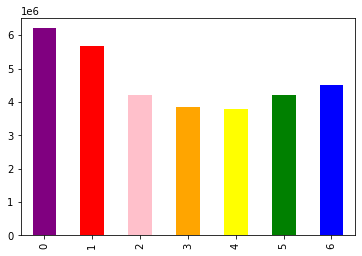

In [10]:
#using color in the bar chart
bar = df_ords_prods['orders_day_of_week'].value_counts().sort_index().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

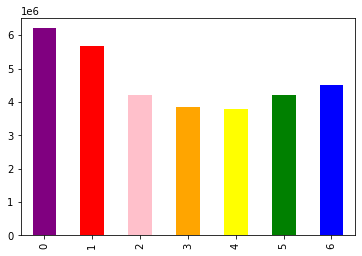

In [11]:
#checking bar was save within the bar object
bar.figure

In [12]:
#saving bar chart to file
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

<AxesSubplot:ylabel='Frequency'>

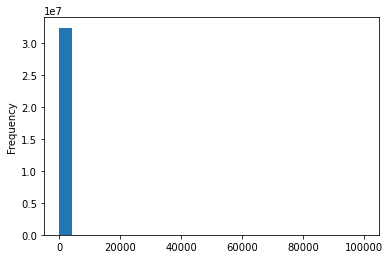

In [13]:
#creating histograms
df_ords_prods['prices'].plot.hist(bins = 25)

In [15]:
#checking stats of 'prices' column to see issue with histogram
df_ords_prods['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [16]:
#checking mean
df_ords_prods['prices'].mean()

11.980225638467232

In [17]:
#checking median
df_ords_prods['prices'].median()

7.4

In [18]:
#checking max- issue was found 
df_ords_prods['prices'].max()

99999.0

<AxesSubplot:xlabel='prices', ylabel='prices'>

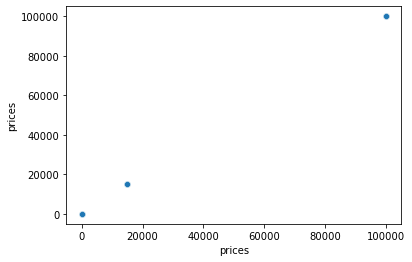

In [19]:
#creating a scatterplot to view outliers
sns.scatterplot(x = 'prices', y = 'prices',data = df_ords_prods)

In [23]:
#drop unneeded columns
df_ords_prods.drop(columns = {'_merge'}, inplace = True)

In [4]:
#checking normal prices to see what values are above
df_ords_prods.loc[df_ords_prods['prices'] > 100]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,_merge,price_range_loc,Busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_order,spending_flag,median_days_since_prior_order,frequency_flag
10030345,912404,17,12,2,14,5.0,21553,5,0,Lowfat 2% Milkfat Cottage Cheese,...,both,High-range product,Regularly busy,Most Orders,40,Regular customer,108.625,High Spender,5.0,Frequent customer
10030346,603376,17,22,6,16,4.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,both,High-range product,Regularly busy,Most Orders,40,Regular customer,108.625,High Spender,5.0,Frequent customer
10030347,3264360,135,2,2,21,13.0,21553,6,0,Lowfat 2% Milkfat Cottage Cheese,...,both,High-range product,Regularly busy,Average Orders,4,New customer,1154.000,High Spender,12.0,Regular customer
10030348,892534,135,3,0,8,12.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,both,High-range product,Busiest days,Average Orders,4,New customer,1154.000,High Spender,12.0,Regular customer
10030349,229704,342,8,1,19,30.0,21553,9,0,Lowfat 2% Milkfat Cottage Cheese,...,both,High-range product,Busiest days,Average Orders,16,Regular customer,114.375,High Spender,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29166209,2249946,204099,29,0,8,4.0,33664,1,0,2 % Reduced Fat Milk,...,both,High-range product,Busiest days,Average Orders,39,Regular customer,NaN,NaN,4.0,Frequent customer
29166210,2363282,204099,31,0,9,2.0,33664,1,1,2 % Reduced Fat Milk,...,both,High-range product,Busiest days,Most Orders,39,Regular customer,NaN,NaN,4.0,Frequent customer
29166211,3181945,204395,13,3,15,8.0,33664,25,0,2 % Reduced Fat Milk,...,both,High-range product,Slowest days,Most Orders,15,Regular customer,NaN,NaN,5.0,Frequent customer
29166212,2486215,205227,7,3,20,4.0,33664,8,0,2 % Reduced Fat Milk,...,both,High-range product,Slowest days,Average Orders,12,Regular customer,NaN,NaN,12.0,Regular customer


In [5]:
#replacing the outlier values with nan
df_ords_prods.loc[df_ords_prods['prices'] > 100, 'prices'] = np.nan

In [6]:
df_ords_prods['prices'].max()

25.0

<AxesSubplot:ylabel='Frequency'>

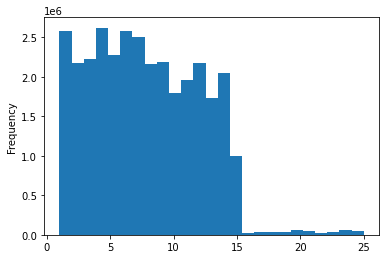

In [7]:
#creating an updated histogram without outliers
df_ords_prods['prices'].plot.hist(bins = 25)

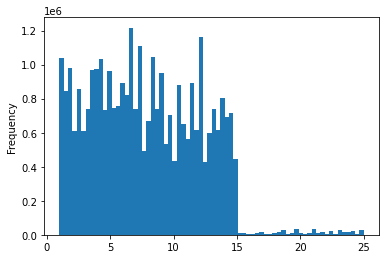

In [31]:
#creating an updated histogram without outliers
hist = df_ords_prods['prices'].plot.hist(bins = 70)

In [32]:
#saving histogram chart to file
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))

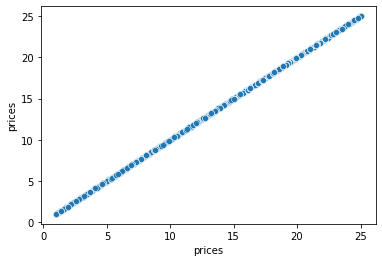

In [33]:
#creating a scatterplot with new values
scat = sns.scatterplot(x = 'prices', y = 'prices',data = df_ords_prods) 

In [34]:
#saving scatterplot to file
scat.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scat_prices.png'))

In [51]:
#creating a list of true/false for random sample
np.random.seed(4)
dev = np.random.rand(len(df_ords_prods)) <= 0.7

In [52]:
#store 70% of the sample in the dataframe big
big = df_ords_prods[dev]

In [53]:
#store 30% if the sample data in the small dataframe
small = df_ords_prods[~dev]

In [54]:
#checking original dataframe structure
len(df_ords_prods)

32404859

In [55]:
len(big)

22683761

In [56]:
len(small)

9721098

In [57]:
#checking the 2 sample dataframe equal the original dataframe structure
len(big) + len(small)

32404859

In [62]:
#using the small sample dataframe to filter out only the 'prices' and 'orders day of week' column
df_2 = small[['orders_day_of_week','prices']]

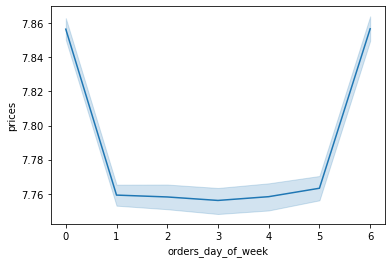

In [63]:
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [64]:
#saving line chart to file
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices_dow.png'))

In [11]:
#export df_ords_prods as a pickle
df_ords_prods.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_flagged2.pkl')) 